<a href="https://colab.research.google.com/github/rajesh0309/KIET/blob/main/U_S_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predict U.S election (Using Random Forest)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/county_census_and_election_result.csv')

In [ ]:
data.shape

(7526, 45)

In [ ]:
data.head()

,year,county_fips,inctot,mortamt1,avrg_age,ftotinc,foodstmp_1_freq,foodstmp_2_freq,sex_2_freq,sex_1_freq,...,empstat_3.0_freq,empstat_2.0_freq,state_po,county_name,democrat,green,liberitarian,other,republican,winner
0,2000,1,24566.4,634.6,46.0,46912.7,93.6,6.4,54.0,46.0,...,38.4,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2,33842.9,1080.1,42.4,65021.9,95.3,4.7,50.3,49.7,...,25.2,4.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,4,28331.7,814.7,45.3,52826.7,95.8,4.2,52.1,47.9,...,38.3,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,5,22782.6,557.5,46.2,43941.3,92.5,7.5,53.0,47.0,...,37.8,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,6,32245.0,1216.3,43.8,61455.3,95.7,4.3,52.0,48.0,...,35.1,3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.tail()

,year,county_fips,inctot,mortamt1,avrg_age,ftotinc,foodstmp_1_freq,foodstmp_2_freq,sex_2_freq,sex_1_freq,...,empstat_3.0_freq,empstat_2.0_freq,state_po,county_name,democrat,green,liberitarian,other,republican,winner
7521,2020,55117,26884.0,704.0,50.3,52592.7,95.6,4.4,49.5,50.5,...,42.3,1.4,WI,SHEBOYGAN,27101.0,2.0,896.0,403.0,37609.0,1.0
7522,2020,55127,28065.5,846.0,49.0,63315.2,94.9,5.1,49.4,50.6,...,37.6,0.8,WI,WALWORTH,22789.0,15.0,641.0,304.0,33851.0,1.0
7523,2020,55133,38557.0,990.6,50.4,80433.1,95.9,4.1,52.8,47.2,...,37.3,2.0,WI,WAUKESHA,103906.0,54.0,3023.0,1364.0,159649.0,1.0
7524,2020,55139,25796.1,667.3,45.9,49219.4,93.5,6.5,47.9,52.1,...,41.5,1.6,WI,WINNEBAGO,44060.0,38.0,1629.0,509.0,47796.0,1.0
7525,2020,56000,28415.2,786.1,48.7,57943.3,94.9,5.1,49.7,50.3,...,37.9,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7526 entries, 0 to 7525
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  7526 non-null   int64  
 1   county_fips           7526 non-null   int64  
 2   inctot                7526 non-null   float64
 3   mortamt1              7526 non-null   float64
 4   avrg_age              7526 non-null   float64
 5   ftotinc               7526 non-null   float64
 6   foodstmp_1_freq       7526 non-null   float64
 7   foodstmp_2_freq       7526 non-null   float64
 8   sex_2_freq            7526 non-null   float64
 9   sex_1_freq            7526 non-null   float64
 10  marst_5_freq          7526 non-null   float64
 11  marst_6_freq          7526 non-null   float64
 12  marst_1_freq          7526 non-null   float64
 13  marst_4_freq          7526 non-null   float64
 14  marst_3_freq          7526 non-null   float64
 15  marst_2_freq         

In [ ]:
data.isnull().sum()

year                       0
county_fips                0
inctot                     0
mortamt1                   0
avrg_age                   0
ftotinc                    0
foodstmp_1_freq            0
foodstmp_2_freq            0
sex_2_freq                 0
sex_1_freq                 0
marst_5_freq               0
marst_6_freq               0
marst_1_freq               0
marst_4_freq               0
marst_3_freq               0
marst_2_freq               0
race_1_freq                0
race_2_freq                0
race_7_freq                0
race_8_freq                0
race_5_freq                0
race_6_freq                0
race_3_freq                0
race_4_freq                0
race_9_freq                0
ctz_stat_1_freq            0
ctz_stat_3_freq            0
ctz_stat_2_freq            0
lang_1_freq                0
lang_2_freq                0
educ_attain_2.0_freq       0
educ_attain_1.0_freq       0
educ_attain_3.0_freq       0
educ_attain_4.0_freq       0
empstat_1.0_fr

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

year                    0
county_fips             0
inctot                  0
mortamt1                0
avrg_age                0
ftotinc                 0
foodstmp_1_freq         0
foodstmp_2_freq         0
sex_2_freq              0
sex_1_freq              0
marst_5_freq            0
marst_6_freq            0
marst_1_freq            0
marst_4_freq            0
marst_3_freq            0
marst_2_freq            0
race_1_freq             0
race_2_freq             0
race_7_freq             0
race_8_freq             0
race_5_freq             0
race_6_freq             0
race_3_freq             0
race_4_freq             0
race_9_freq             0
ctz_stat_1_freq         0
ctz_stat_3_freq         0
ctz_stat_2_freq         0
lang_1_freq             0
lang_2_freq             0
educ_attain_2.0_freq    0
educ_attain_1.0_freq    0
educ_attain_3.0_freq    0
educ_attain_4.0_freq    0
empstat_1.0_freq        0
empstat_3.0_freq        0
empstat_2.0_freq        0
state_po                0
county_name 

In [ ]:
print(data.avrg_age)

1529    48.6
1530    47.1
1531    48.2
1532    47.2
1533    40.6
        ... 
7520    49.1
7521    50.3
7522    49.0
7523    50.4
7524    45.9
Name: avrg_age, Length: 1670, dtype: float64


In [ ]:
print(data.sex_1_freq)

1529    47.5
1530    45.2
1531    45.4
1532    45.0
1533    47.9
        ... 
7520    48.7
7521    50.5
7522    50.6
7523    47.2
7524    52.1
Name: sex_1_freq, Length: 1670, dtype: float64


In [ ]:
x=data['avrg_age'].values
y=data['sex_1_freq'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [ ]:
print(X_train.shape)
print(Y_test.shape)
print(X_train.shape)
print(Y_test.shape)

(1118,)
(552,)
(1118,)
(552,)


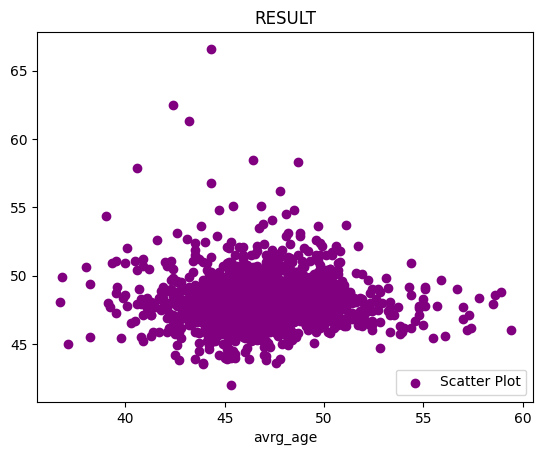

In [ ]:
plt.scatter(x,y ,color="purple",label="Scatter Plot")
plt.title('RESULT')
plt.xlabel('avrg_age')
plt.legend(loc=4)
plt.show()

In [ ]:
print("avrg_age {:.4f}".format(lm.score(x_train,y_train)))
print("sex_1_freq {:.4f}".format(lm.score(x_test,y_test)))

NameError: ignored